In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
import os
import numpy as np


In [7]:
def read_plaket(path, file_name, chains, conf_max):
    data = []
    for chain in chains:
        for i in range(conf_max+1):
            file_path = f'{path}/{chain}/{file_name}_{i:04}'
            # print(file_path)
            if (os.path.isfile(file_path)):
                data.append(pd.read_csv(file_path))
                data[-1]['conf'] = i
                data[-1]['chain'] = chain
    return pd.concat(data)

def plot_plaket_therm(data):
    # data = data[data['conf'] >= 0]
    data = data[data['conf'] <= 100]
    fg = seaborn.FacetGrid(data=data, hue='chain', height=5, aspect=1.2)
    fg.map(plt.plot, 'conf', 'plaket').add_legend()
    # plt.yscale('log')
    # plt.xscale('log')

def plaket_mean(data):
    # data = data[data['conf'] >= 40]
    n = data['plaket'].size
    result =  data['plaket'].agg([np.mean, np.std])
    result['std'] = result['std'] / math.sqrt(n)
    return result

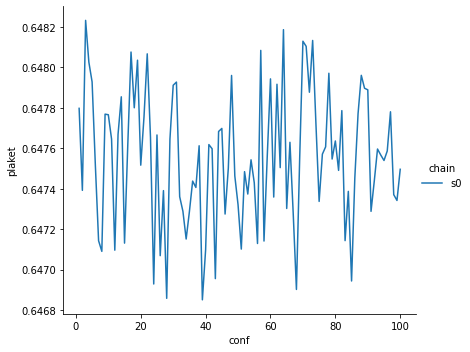

In [5]:
chains = ['s0']
data = read_plaket('../data/plaket/su2/gluodynamics/32^3x8/beta2.478/original', 'plaket', chains, 9999)
plot_plaket_therm(data)

In [8]:
chains = ['s0']
data = read_plaket('../data/plaket/su2/gluodynamics/32^3x8/beta2.478/original', 'plaket', chains, 9999)
print(plaket_mean(data))

mean    0.647548
std     0.000004
Name: plaket, dtype: float64


In [56]:
chains = ['s5']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.40/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656213
std     0.000004
Name: plaket, dtype: float64


In [57]:
chains = ['s6']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.40/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656220
std     0.000004
Name: plaket, dtype: float64


In [58]:
chains = ['s0', 's1', 's2', 's3', 's4']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.40/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656219
std     0.000005
Name: plaket, dtype: float64


In [59]:
chains = ['s0', 's1', 's2', 's3', 's4']
data = read_plaket('../data/plaket/su2/qc2dstag/40^4/mu0.35/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656194
std     0.000004
Name: plaket, dtype: float64


In [74]:
chains = ['s0', 's1']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x64/mu0.10/original', 'plaket', chains, 1000)
print(plaket_mean(data))

mean    0.656288
std     0.000005
Name: plaket, dtype: float64


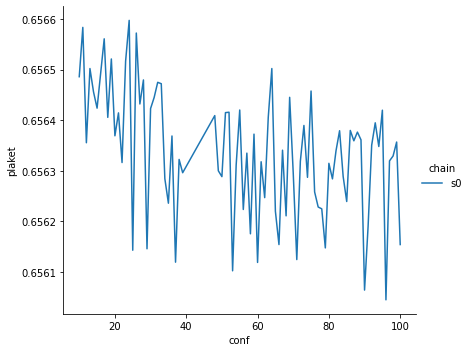

In [71]:
chains = ['s0']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x64/mu0.10/original', 'plaket', chains, 1000)
plot_plaket_therm(data)

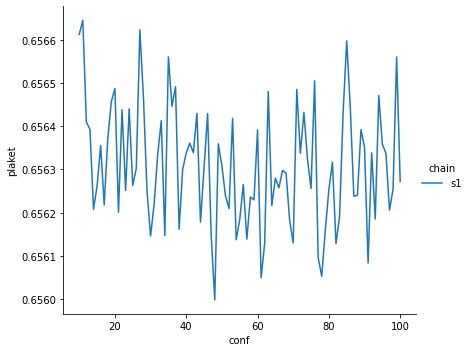

In [72]:
chains = ['s1']
data = read_plaket('../data/plaket/su2/qc2dstag/32^3x64/mu0.10/original', 'plaket', chains, 1000)
plot_plaket_therm(data)

In [5]:
def binning_dependence(path):
    data = pd.read_csv(path)

    fg = seaborn.FacetGrid(data=data, height=5, aspect=1.2)
    fg.map(plt.errorbar, 'bin_size', 'plaket_jackknife', 'err_jackknife', marker="o", fmt='', linestyle = '')

    plt.show()

    fg = seaborn.FacetGrid(data=data, height=5, aspect=1.2)
    fg.map(plt.errorbar, 'bin_size', 'plaket', 'err', marker="o", fmt='', linestyle = '')

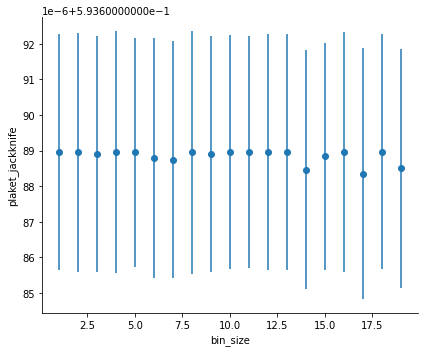

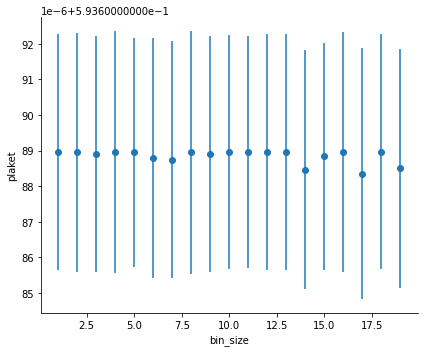

In [6]:
binning_dependence(f'../result/plaket/su3/gluodynamics/24^4/beta6.0/plaket_binning_su3.csv')

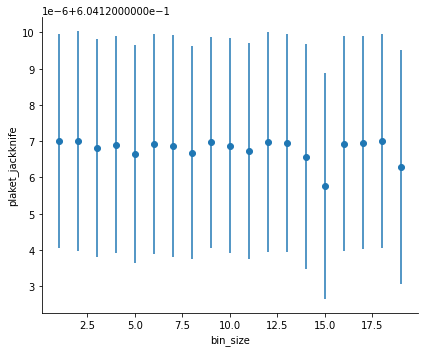

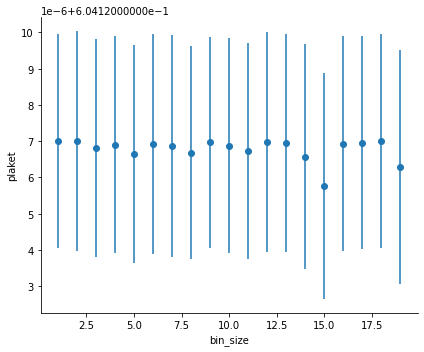

In [9]:
binning_dependence(f'../result/plaket/su3/gluodynamics/28^4/beta6.1/plaket_binning_su3.csv')

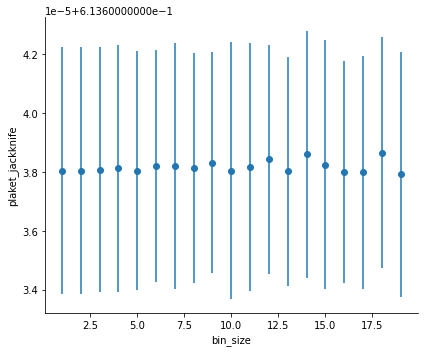

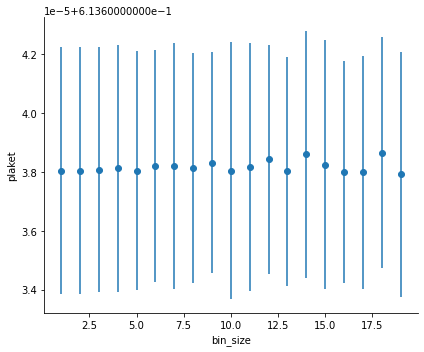

In [10]:
binning_dependence(f'../result/plaket/su3/gluodynamics/32^4/beta6.2/plaket_binning_su3.csv')

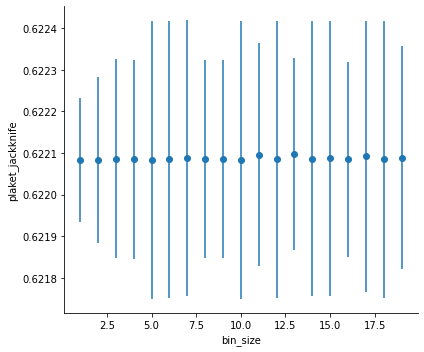

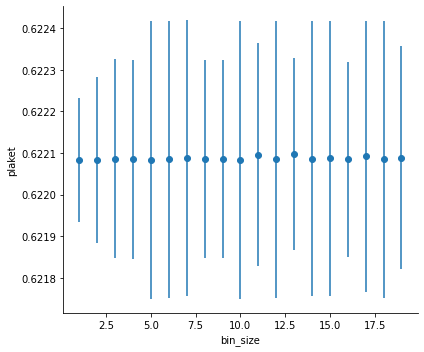

In [8]:
binning_dependence(f'../result/plaket/su3/gluodynamics/36^4/beta6.3/plaket_binning_su3.csv')